In [32]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 

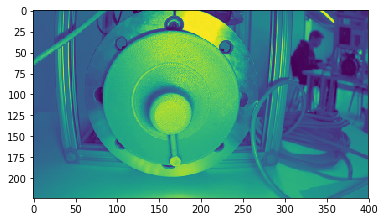

In [33]:
image_file = 'unknown.png'
img = cv2.imread(image_file)
res = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(res)

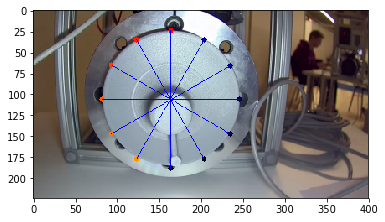

In [145]:
img = cv2.imread(image_file)
res = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(res, cv2.HOUGH_GRADIENT,
                           1.2, 100, 140, 150, 140)

the_circle = None 
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        the_circle = (x, y, r)
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(res, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(res, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
circle_mask = np.zeros(res.shape[:2], dtype='uint8')
cv2.circle(circle_mask, tuple(the_circle[:2]), the_circle[-1],
            255, -1)
masked_img = cv2.bitwise_and(res, res, mask=circle_mask)

ANGLE_RESOLUTION = 5 # degs 

divide_circles = 360/60 # minute scale 
x, y, r = the_circle
circum = 2*np.pi*r
# generate a set of points on a circle
for ang in np.arange(0, 180, 30):
    # minute 
    xp = int(r*np.sin(ang*(np.pi/180))) + x
    yp = int(r*np.cos(ang*(np.pi/180))) + y
    cv2.circle(img, (xp, yp), 3, (int(ang), 0, 0), -1)
    # reflect a point 
    angp = 180 + ang
    xp2 = int(r*np.sin(angp*(np.pi/180))) + x
    yp2 = int(r*np.cos(angp*(np.pi/180))) + y
    cv2.circle(img, (xp2, yp2), 3, (0, int(ang), 255), -1)
    cv2.line(img, (xp, yp), (xp2, yp2), (255, 0, 0))
    
plt.imshow(img[...,::-1])

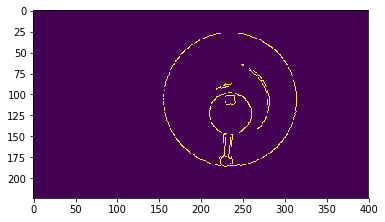

In [162]:
canny = cv2.Canny(masked_img, 120, 230)
plt.imshow(canny[...,::-1])

[[[164.5 106.5  79.2]
  [162.5 105.5  78. ]
  [163.5 107.5  78.9]
  ...
  [244.5   6.5  51.2]
  [ 75.5  13.5  50.7]
  [ 80.5  11.5  52.5]]]


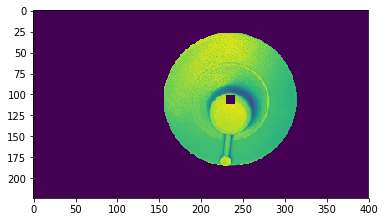

In [164]:
from copy import deepcopy
masked_copy = deepcopy(masked_img)
circles2 = cv2.HoughCircles(masked_copy, cv2.HOUGH_GRADIENT, 
                            1., 0.1, 120, 250, 3, 50)

# small_circle = None 
# print(circles2)
if circles2 is not None:
    print(circles2)
    if len(circles2[0]) > 1:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles2 = np.round(circles2[0, :]).astype("int")
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles2:
            if r > 30: continue
            small_circle = (x, y, r)
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(masked_copy, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(masked_copy, (x - 5, y - 5), 
                          (x + 5, y + 5), (0, 128, 255), -1)
# # small_circle_mask = np.zeros(res.shape[:2], dtype='uint8')
# # cv2.circle(small_circle_mask, tuple(the_circle[:2]), the_circle[-1],
# #             255, -1)
# # smll_masked_img = cv2.bitwise_and(res, res, mask=circle_mask)
plt.imshow(masked_copy[...,::-1])

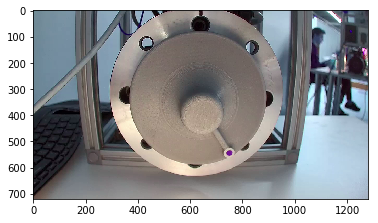

In [165]:
vcap = cv2.VideoCapture('output_left1pink.mp4')

ret, frame = vcap.read()
plt.imshow(frame)

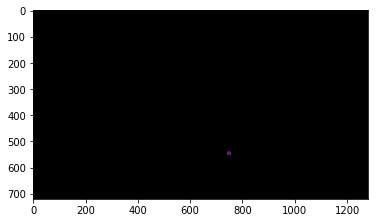

In [176]:
vcap = cv2.VideoCapture('output_left1pink.mp4')

while True:
    ret, frame = vcap.read()
    # converting from BGR to HSV color space
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)


    # Range for upper range
    lower_red = np.array([145, 220, 100])
    upper_red = np.array([169, 242, 195])
    mask = cv2.inRange(hsv,lower_red,upper_red)

    # Generating the final mask to detect red color
    res1 = cv2.bitwise_and(frame,frame,mask=mask)
    cv2.imshow('Res', res1)